<a href="https://colab.research.google.com/github/Shrey0601/Hello/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/up-crime-data-year-2019/MR data - Compiled Data Set.csv


In [ ]:
df = pd.read_csv('../input/up-crime-data-year-2019/MR data - Compiled Data Set.csv')
df.fillna(0,inplace=True)
#print(df['City '])
print(df.columns)
df.to_string

Index(['City ', 'Title', 'Text',
       'Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other',
       'Number of child victims', 'Number of male victims(adult)',
       'Number of female victims(adult)',
       'Kidnnaping:\nNumber of child victims', 'Number of male(adult) ',
       'Number of female(adult)',
       'Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act',
       'Number of adult victims', 'Number of childs invoved'],
      dtype='object')


<bound method DataFrame.to_string of          City                                               Title  \
0    Ghaziabad  Minor molests mute girl, sent to observation home   
1    Ghaziabad  Family out to buy car robbed of Rs 1 lakh by b...   
2    Ghaziabad  This gang posed as cops to extort youths, couples   
3    Ghaziabad  Residents object to loud music, thrashed in Gh...   
4    Ghaziabad  Man kills self after being refused money for d...   
..         ...                                                ...   
461    Lucknow  Top cop stirs row, says girl filed case after ...   
462    Lucknow  Unnao girl passes away after 40-hour battle fo...   
463    Lucknow  Lucknow: Stalker thrashes dad, girl poisons he...   
464    Lucknow    Uttar Pradesh: Woman accuses boss of harassment   
465    Lucknow  Buyer knifes fish vendor to death over Rs 10 i...   

                                                  Text  \
0    GHAZIABAD: A 12-year-old boy was sent to an ob...   
1    GHAZIABAD: A 

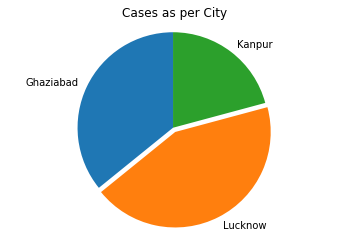

{'Ghaziabad': 167, 'Lucknow': 202, 'Kanpur': 97}


In [ ]:
City_dict={'Ghaziabad':0, 'Lucknow':0, 'Kanpur':0}

for city in df['City ']:
  City_dict[city]+=1
Explode=[0,0.05,0]
plt.pie(City_dict.values(),explode=Explode,labels=City_dict.keys(),startangle=90)
plt.axis('equal')
plt.title("Cases as per City")
plt.show()
print(City_dict)

This Pie Chart shows the number of crimes comitted in the city, with Lucknow being at the top of the crime list.
This is an alarming situation, not only for Lucknow city, but also for Ghaziabad and Kanpur city.

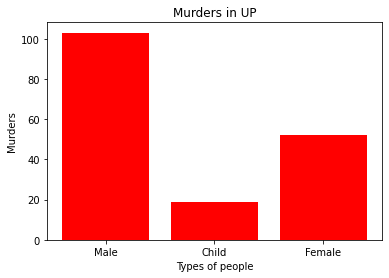

        0      1
0   Child   19.0
1  Female   52.0
2    Male  103.0


In [ ]:
Murder_dict={'Child':0,'Female':0,'Male':0}
Ghaziabad_Murder={'Child':0,'Female':0,'Male':0}
Lucknow_Murder={'Child':0,'Female':0,'Male':0}
Kanpur_Murder={'Child':0,'Female':0,'Male':0}

count=0
for row in df['Number of child victims']:
    Murder_dict['Child']+=row
    if(row>0):
      if df['City '][count] == 'Ghaziabad':
        Ghaziabad_Murder['Child']+=1
      elif df['City '][count] == 'Lucknow':
        Lucknow_Murder['Child']+=1
      else:
        Kanpur_Murder['Child']+=1
    count+=1

count=0
for row in df['Number of male victims(adult)']:
    Murder_dict['Male']+=row
    if(row>0):
      if df['City '][count] == 'Ghaziabad':
        Ghaziabad_Murder['Male']+=1
      elif df['City '][count] == 'Lucknow':
        Lucknow_Murder['Male']+=1
      else:
        Kanpur_Murder['Male']+=1
    count+=1

count=0
for row in df['Number of female victims(adult)']:
    Murder_dict['Female']+=row
    if(row>0):
      if df['City '][count] == 'Ghaziabad':
        Ghaziabad_Murder['Female']+=1
      elif df['City '][count] == 'Lucknow':
        Lucknow_Murder['Female']+=1
      else:
        Kanpur_Murder['Female']+=1
    count+=1
    
divisions=["Male", "Child","Female"]
Murders=[Murder_dict['Male'],Murder_dict['Child'],Murder_dict['Female']]
plt.bar(divisions,Murders,color='red')
plt.xlabel("Types of people")
plt.ylabel("Murders")
plt.title("Murders in UP")
plt.show()
print(pd.DataFrame(list(Murder_dict.items())))

This bar graph shows the number of Murders comitted as per the victim's age and gender, with the number of men succumbed to death, being the highest .

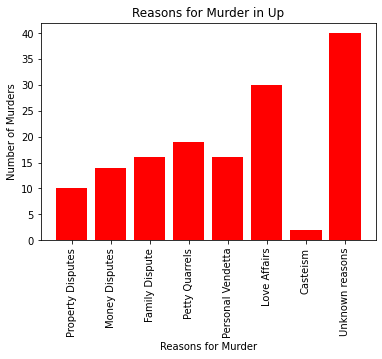

                   0   1
0  Property Disputes  10
1     Money Disputes  14
2     Family Dispute  16
3     Petty Quarrels  19
4  Personal Vendetta  16
5       Love Affairs  30
6           Casteism   2
7    Unknown reasons  40


In [ ]:
Reason_Murder={'Property Disputes':0,'Money Disputes':0,'Family Dispute':0,'Petty Quarrels':0,'Personal Vendetta':0,'Love Affairs':0,'Casteism':0,'Unknown reasons':0}

for row in df['Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other']:
    if not row == 0:
        if row in Reason_Murder:
            Reason_Murder[row]+=1
plt.bar(Reason_Murder.keys(),Reason_Murder.values(),color='red')
plt.xlabel("Reasons for Murder")
plt.ylabel("Number of Murders")
plt.title("Reasons for Murder in Up")
plt.xticks(rotation='vertical')
plt.show()
print(pd.DataFrame(list(Reason_Murder.items())))

The reasons for the Murders commited are plotted above, with most of the reasons being unknown.

But the cases of Murders due to love affairs are also very high in the state and police should take a strict action against the criminals.

Murders in Ghaziabad : {'Child': 4, 'Female': 13, 'Male': 30}
Murders in Lucknow : {'Child': 3, 'Female': 22, 'Male': 41}
Murders in Kanpur : {'Child': 6, 'Female': 12, 'Male': 24}


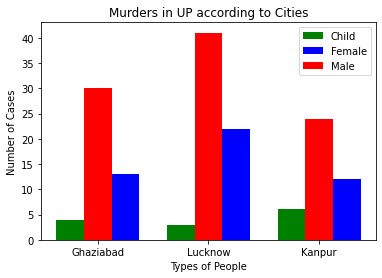

In [ ]:
divisions=['Ghaziabad','Lucknow','Kanpur']
index=np.arange(3)
width=0.25
Child=[Ghaziabad_Murder['Child'],Lucknow_Murder['Child'],Kanpur_Murder['Child']]
Female=[Ghaziabad_Murder['Female'],Lucknow_Murder['Female'],Kanpur_Murder['Female']]
Male=[Ghaziabad_Murder['Male'],Lucknow_Murder['Male'],Kanpur_Murder['Male']]

plt.bar(index,Child,width,color='green',label='Child')
plt.bar(index+width*2,Female,width,color='blue',label='Female')
plt.bar(index+width,Male,width,color='red',label='Male')

plt.xlabel("Types of People")
plt.ylabel("Number of Cases")
plt.xticks(index+width,divisions)
plt.title("Murders in UP according to Cities")
plt.legend(loc='best')
print("Murders in Ghaziabad :",end=" ")
print(Ghaziabad_Murder)
print("Murders in Lucknow :",end=" ")
print(Lucknow_Murder)
print("Murders in Kanpur :",end=" ")
print(Kanpur_Murder)


A better look at the number of Murders as per the city and the age groups is provided by this graph.

It is seen that the number of Murders are following the same order in each of the cities:
Men > Women > Children

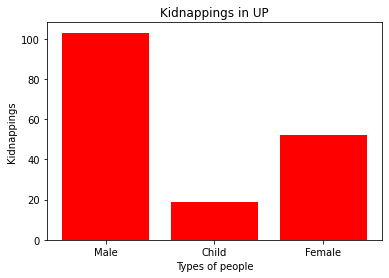

  Types of People  Kidnappings
0           Child         13.0
1          Female          3.0
2            Male         10.0


In [ ]:
Kidnapping_dict={'Child':0,'Female':0,'Male':0}

for row in df['Kidnnaping:\nNumber of child victims']:
    Kidnapping_dict['Child']+=row

for row in df['Number of male(adult) ']:
    Kidnapping_dict['Male']+=row

for row in df['Number of female(adult)']:
    Kidnapping_dict['Female']+=row

divisions=["Male", "Child","Female"]
Kidnapping=[Kidnapping_dict['Male'],Kidnapping_dict['Child'],Kidnapping_dict['Female']]
plt.bar(divisions,Murders,color='red')
plt.xlabel("Types of people")
plt.ylabel("Kidnappings")
plt.title("Kidnappings in UP")
plt.show()
print(pd.DataFrame(list(Kidnapping_dict.items()),columns=['Types of People','Kidnappings']))

The cases of Kidnappings in the state according to age groups is represented above.

In [ ]:
a=[]
Crime_Women={}
Affected={}
count=0
for row in df['Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act']:
    str(row).lstrip()
    a=[int(i) for i in str(row).split(',')]
    for x in a:
        if x==0 or x>10:
            continue
        if not x in Crime_Women:
            Crime_Women[x]=1  
            Affected[x]=df['Number of adult victims'][count]+df['Number of childs invoved'][count]  
        else:
            Crime_Women[x]+=1
            Affected[x]+=df['Number of adult victims'][count]+df['Number of childs invoved'][count]
    count+=1        


The Crime against Women are the main issues of concern for today's society.

The above code calculates the victims of the crimes and also the different types of crimes commited.

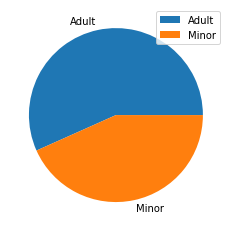

In [ ]:
Age_Crimes=[]
count=0
for row in df['Number of adult victims']:
    count+=row
Age_Crimes.append(count)

count=0
for row in df['Number of childs invoved']:
  count+=row
Age_Crimes.append(count)

plt.pie(Age_Crimes,labels=['Adult','Minor'])
plt.legend()
plt.show()

This pie chart shows proportion of the crimes commited as per the age groups affected.
The adult females are more affected although the number of children affected by it is also alarming.


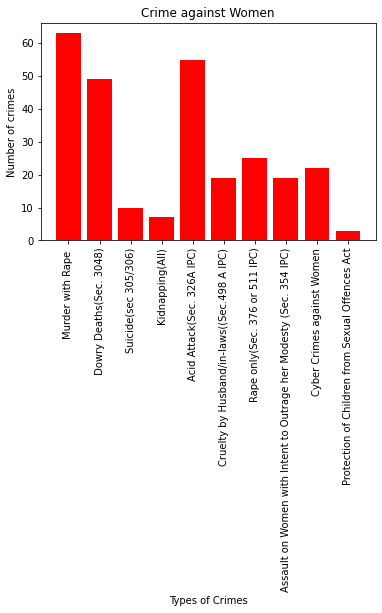

                                      Type of Crimes  Number of Crimes
0                                  Murder with Rape                 63
1                            Dowry Deaths(Sec. 3048)                49
2                               Suicide(sec 305/306)                10
3                                    Kidnapping(All)                 7
4                         Acid Attack(Sec. 326A IPC)                55
5         Cruelty by Husband/in-laws((Sec.498 A IPC)                19
6                     Rape only(Sec. 376 or 511 IPC)                25
7  Assault on Women with Intent to Outrage her Mo...                19
8                         Cyber Crimes against Women                22
9    Protection of Children from Sexual Offences Act                 3


In [ ]:
divisions=['Murder with Rape ', ' Dowry Deaths(Sec. 3048)', 'Suicide(sec 305/306)', 'Kidnapping(All)', 'Acid Attack(Sec. 326A IPC)', 'Cruelty by Husband/in-laws((Sec.498 A IPC)','Rape only(Sec. 376 or 511 IPC)','Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)','Cyber Crimes against Women','Protection of Children from Sexual Offences Act']    
Number_Crimes=[]
for x in Crime_Women.values():
    Number_Crimes.append(x)
#print(Number_Crimes)
plt.bar(divisions,Number_Crimes,color='red')
plt.xlabel("Types of Crimes")
plt.ylabel("Number of crimes")
plt.title("Crime against Women")
plt.xticks(rotation='vertical')
plt.show()
print(pd.DataFrame(list(zip(divisions,Number_Crimes)),columns=['Type of Crimes','Number of Crimes']))

This plot shows different reasons for the crimes commited.

Clearly the main reason stands "Murder with Rape" which is an extremely heinous act.

The Dowry Deaths is also a type of crime which should be controllled and can mainly be brought about by the empowerment of people.

Also the reasons 6,7 and 8 seem to be closely related .

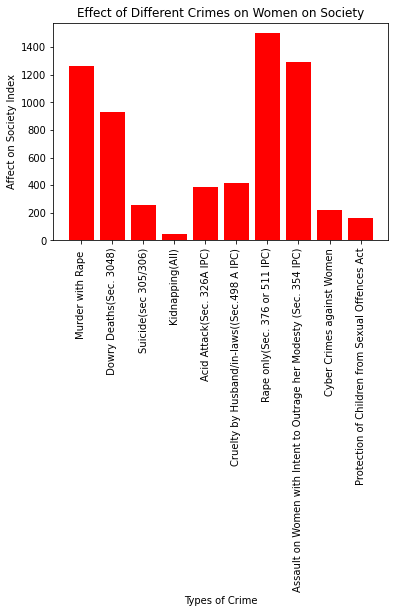

                                                         0
Murder with Rape                                    1260.0
 Dowry Deaths(Sec. 3048)                             931.0
Suicide(sec 305/306)                                 260.0
Kidnapping(All)                                       49.0
Acid Attack(Sec. 326A IPC)                           385.0
Cruelty by Husband/in-laws((Sec.498 A IPC)           418.0
Rape only(Sec. 376 or 511 IPC)                      1500.0
Assault on Women with Intent to Outrage her Mod...  1292.0
Cyber Crimes against Women                           220.0
Protection of Children from Sexual Offences Act      165.0


In [ ]:
divisions=['Murder with Rape ', ' Dowry Deaths(Sec. 3048)', 'Suicide(sec 305/306)', 'Kidnapping(All)', 'Acid Attack(Sec. 326A IPC)', 'Cruelty by Husband/in-laws((Sec.498 A IPC)','Rape only(Sec. 376 or 511 IPC)','Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)','Cyber Crimes against Women','Protection of Children from Sexual Offences Act']    
global Affected

Society_Affect=[]

#print(Affected)
for x in range(1,11):
  Society_Affect.append(Affected[x]*Number_Crimes[x-1])
plt.bar(divisions,Society_Affect,color='red')
plt.xlabel("Types of Crime")
plt.ylabel("Affect on Society Index")
plt.title("Effect of Different Crimes on Women on Society")
plt.xticks(rotation='vertical')
plt.show()
print(pd.DataFrame(list(Society_Affect),index=divisions))


On multiplying the number of crimes of a paticular type and the people affected by it, we get the effect of that crime on the society and clearly from the above plot, "Rape only" is the crime which has worsely affected the society and serious action should be taken against it.